In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf

plt.style.use('seaborn-v0_8')
%matplotlib inline

print("Pandas version:", pd.__version__)
print("TensorFlow version:", tf.__version__)

Pandas version: 2.2.3
TensorFlow version: 2.19.0


In [36]:
data_dir = Path('DS_uni_labs/lab3/archive')
train_data_dir = data_dir / 'data_train'
test_data_dir = data_dir / 'data_test'

labels_fdd_train = pd.read_csv(data_dir/'labels_fdd_train.csv')
labels_fdd_test = pd.read_csv(data_dir/'labels_fdd_test.csv')
labels_rul_train = pd.read_csv(data_dir/'labels_rul_train.csv')
labels_rul_test = pd.read_csv(data_dir/'labels_rul_test.csv')
print("Размер меток FDD (train):", labels_fdd_train.shape)
print("Размер меток FDD (test):", labels_fdd_test.shape)
print("Размер меток RUL (train):", labels_rul_train.shape)
print("Размер меток RUL (test):", labels_rul_test.shape)

Размер меток FDD (train): (2100, 2)
Размер меток FDD (test): (900, 2)
Размер меток RUL (train): (2100, 2)
Размер меток RUL (test): (900, 2)


In [37]:
print("\nПример меток FDD (train):")
display(labels_fdd_train.head())
print("\nПример меток FDD (test):")
display(labels_fdd_test.head())

print("\nПример меток RUL (train):")
display(labels_rul_train.head())
print("\nПример меток RUL (test):")
display(labels_rul_test.head())

print("\nРаспределение классов FDD (train):")
print(labels_fdd_train['category'].value_counts(normalize=True))
print("\nРаспределение классов FDD (test):")
print(labels_fdd_test['category'].value_counts(normalize=True))


Пример меток FDD (train):


,id,category
0,2_trans_497.csv,1
1,2_trans_483.csv,1
2,2_trans_2396.csv,1
3,2_trans_1847.csv,1
4,2_trans_2382.csv,1



Пример меток FDD (test):


,id,category
0,2_trans_1853.csv,1
1,2_trans_1106.csv,1
2,2_trans_1112.csv,1
3,2_trans_1674.csv,1
4,2_trans_1890.csv,1



Пример меток RUL (train):


,id,predicted
0,2_trans_497.csv,550
1,2_trans_483.csv,1093
2,2_trans_2396.csv,861
3,2_trans_1847.csv,1093
4,2_trans_2382.csv,488



Пример меток RUL (test):


,id,predicted
0,2_trans_1853.csv,693
1,2_trans_1106.csv,1093
2,2_trans_1112.csv,1093
3,2_trans_1674.csv,430
4,2_trans_1890.csv,502



Распределение классов FDD (train):
category
1    0.811905
4    0.091905
3    0.053810
2    0.042381
Name: proportion, dtype: float64

Распределение классов FDD (test):
category
1    0.812222
4    0.091111
3    0.054444
2    0.042222
Name: proportion, dtype: float64


In [38]:
def load_transformer_data(data_dir, num_files=100):
    all_files = glob.glob(str(data_dir / '*.csv'))
    dataframes = []
    
    for file in all_files[:num_files]:
        transformer_id = os.path.basename(file).split('.')[0]
        df = pd.read_csv(file)
        df['transformer_id'] = transformer_id
        dataframes.append(df)
    
    return dataframes

train_dfs = load_transformer_data(train_data_dir, num_files=100)
test_dfs = load_transformer_data(test_data_dir, num_files=100)

print(f"Загружено {len(train_dfs)} файлов для обучения")
print(f"Загружено {len(test_dfs)} файлов для теста")

Загружено 100 файлов для обучения
Загружено 100 файлов для теста


In [39]:
sample_df = train_dfs[0]
print("\nПример данных трансформатора:")
print("Размер:", sample_df.shape)
print("Столбцы:", sample_df.columns.tolist())
display(sample_df.head())

print("\nПропущенные значения в первых 5 трансформаторах (train):")
for i, df in enumerate(train_dfs[:5]):
    print(f"Трансформатор {i+1} пропуски:\n", df.isnull().sum())


Пример данных трансформатора:
Размер: (420, 5)
Столбцы: ['H2', 'CO', 'C2H4', 'C2H2', 'transformer_id']


,H2,CO,C2H4,C2H2,transformer_id
0,0.001293,0.009301,0.003227,0.000244,2_trans_1210
1,0.001294,0.009317,0.003235,0.000244,2_trans_1210
2,0.001295,0.009332,0.003243,0.000244,2_trans_1210
3,0.001295,0.009349,0.003251,0.000245,2_trans_1210
4,0.001296,0.009366,0.003259,0.000245,2_trans_1210



Пропущенные значения в первых 5 трансформаторах (train):
Трансформатор 1 пропуски:
 H2                0
CO                0
C2H4              0
C2H2              0
transformer_id    0
dtype: int64
Трансформатор 2 пропуски:
 H2                0
CO                0
C2H4              0
C2H2              0
transformer_id    0
dtype: int64
Трансформатор 3 пропуски:
 H2                0
CO                0
C2H4              0
C2H2              0
transformer_id    0
dtype: int64
Трансформатор 4 пропуски:
 H2                0
CO                0
C2H4              0
C2H2              0
transformer_id    0
dtype: int64
Трансформатор 5 пропуски:
 H2                0
CO                0
C2H4              0
C2H2              0
transformer_id    0
dtype: int64


In [40]:
print("Первые 5 идентификаторов из train_dfs (после очистки):")
for df in train_dfs[:5]:
    transformer_id = df['transformer_id'].iloc[0]
    transformer_id_clean = transformer_id.replace('.csv', '')
    print(transformer_id_clean)

print("\nПервые 5 идентификаторов из labels_fdd_train:")
print(labels_fdd_train['id'].head())

Первые 5 идентификаторов из train_dfs (после очистки):
2_trans_1210
2_trans_535
2_trans_2439
2_trans_2746
2_trans_1434

Первые 5 идентификаторов из labels_fdd_train:
0     2_trans_497.csv
1     2_trans_483.csv
2    2_trans_2396.csv
3    2_trans_1847.csv
4    2_trans_2382.csv
Name: id, dtype: object


In [41]:
train_dfs_labeled = []
for df in train_dfs:
    transformer_id = df['transformer_id'].iloc[0]
    transformer_id_clean = transformer_id.replace('.csv', '')
    label = labels_fdd_train[labels_fdd_train['id'].str.replace('.csv', '') == transformer_id_clean]['category'].values
    if len(label) > 0:
        df['fdd_label'] = label[0]
        train_dfs_labeled.append(df)
    else:
        print(f"Не найдена метка для {transformer_id_clean}")

print(f"Объединено {len(train_dfs_labeled)} файлов с метками FDD")
if len(train_dfs_labeled) > 0:
    print("\nПример объединенного DataFrame:")
    display(train_dfs_labeled[0].head())
else:
    print("Нет данных для отображения.")

Объединено 100 файлов с метками FDD

Пример объединенного DataFrame:


,H2,CO,C2H4,C2H2,transformer_id,fdd_label
0,0.001293,0.009301,0.003227,0.000244,2_trans_1210,1
1,0.001294,0.009317,0.003235,0.000244,2_trans_1210,1
2,0.001295,0.009332,0.003243,0.000244,2_trans_1210,1
3,0.001295,0.009349,0.003251,0.000245,2_trans_1210,1
4,0.001296,0.009366,0.003259,0.000245,2_trans_1210,1



Статистики признаков (газы):


,H2,CO,C2H4,C2H2
count,4.200000e+04,42000.000000,4.200000e+04,4.200000e+04
mean,1.708941e-03,0.016792,4.864877e-03,2.096164e-04
std,9.241986e-04,0.010275,2.683137e-03,1.174931e-04
min,5.528645e-07,0.000002,5.580020e-07,3.696725e-09
25%,9.119082e-04,0.008720,2.772515e-03,1.089646e-04
50%,1.719468e-03,0.016949,4.755042e-03,2.238758e-04
75%,2.462247e-03,0.024368,7.128566e-03,3.003602e-04
max,4.851330e-03,0.054506,1.297721e-02,5.850821e-04


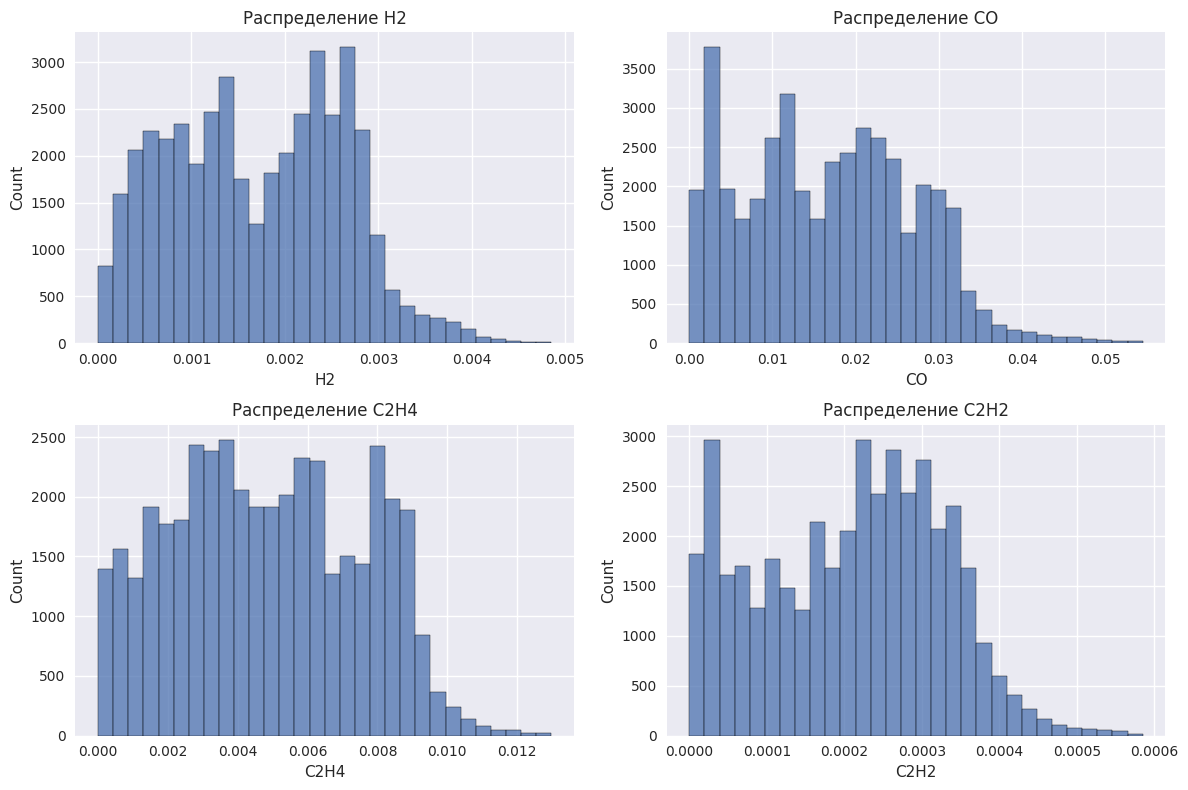

In [42]:
all_train_data = pd.concat(train_dfs_labeled, ignore_index=True)

print("\nСтатистики признаков (газы):")
display(all_train_data.drop(['transformer_id', 'fdd_label'], axis=1).describe())

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
gas_columns = [col for col in all_train_data.columns if col not in ['transformer_id', 'fdd_label']]

for i, col in enumerate(gas_columns):
    sns.histplot(all_train_data[col], bins=30, ax=axes[i])
    axes[i].set_title(f"Распределение {col}")
plt.tight_layout()
plt.show()

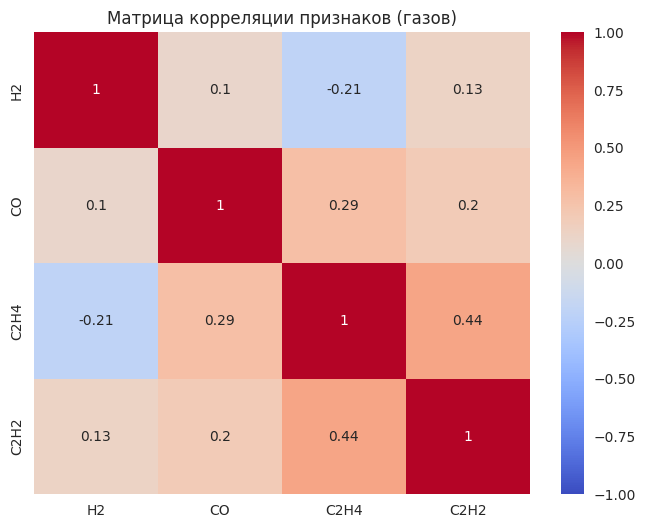

In [43]:
correlation_matrix = all_train_data[gas_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляции признаков (газов)")
plt.show()

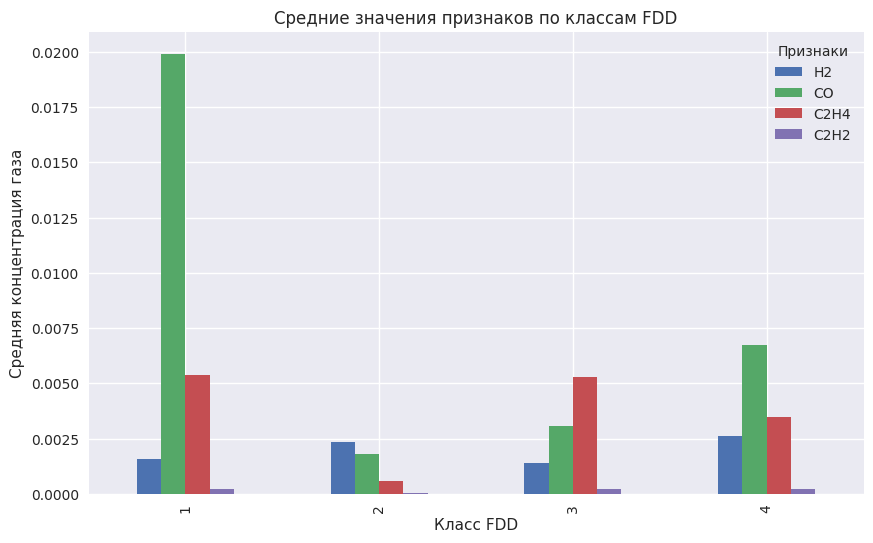

In [44]:
mean_by_class = all_train_data.groupby('fdd_label')[gas_columns].mean()
mean_by_class.plot(kind='bar', figsize=(10, 6))
plt.title("Средние значения признаков по классам FDD")
plt.xlabel("Класс FDD")
plt.ylabel("Средняя концентрация газа")
plt.legend(title="Признаки")
plt.show()

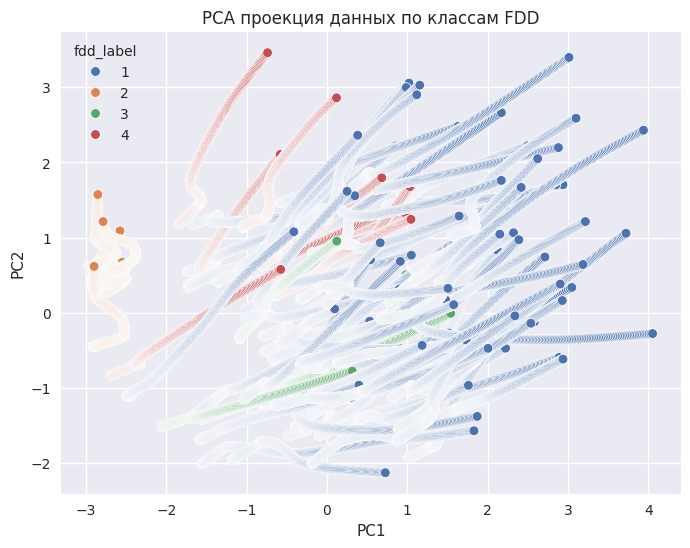

Объясненная дисперсия PCA: [0.40642977 0.28173186]


In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_train_data[gas_columns])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'fdd_label': all_train_data['fdd_label']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='fdd_label', palette='deep')
plt.title("PCA проекция данных по классам FDD")
plt.show()

print("Объясненная дисперсия PCA:", pca.explained_variance_ratio_)

In [46]:
print("Столбцы в labels_rul_train:", labels_rul_train.columns)
print("\nПервые строки labels_rul_train:")
display(labels_rul_train.head())

Столбцы в labels_rul_train: Index(['id', 'predicted'], dtype='object')

Первые строки labels_rul_train:


,id,predicted
0,2_trans_497.csv,550
1,2_trans_483.csv,1093
2,2_trans_2396.csv,861
3,2_trans_1847.csv,1093
4,2_trans_2382.csv,488


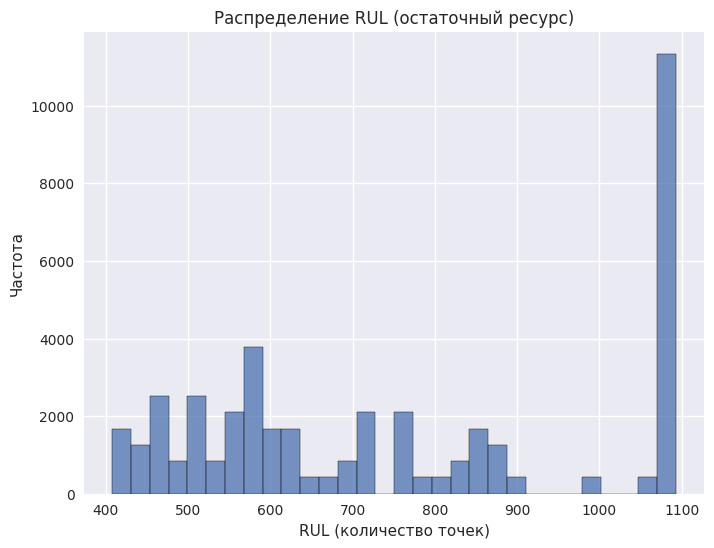


Корреляция RUL с признаками:
H2     -0.229849
CO     -0.304252
C2H4   -0.219987
C2H2   -0.422192
Name: rul, dtype: float64


In [47]:
train_dfs_rul = []
for df in train_dfs:
    transformer_id = df['transformer_id'].iloc[0]
    transformer_id_clean = transformer_id.replace('.csv', '')
    rul = labels_rul_train[labels_rul_train['id'].str.replace('.csv', '') == transformer_id_clean]['predicted'].values  # Заменил rul на predicted
    if len(rul) > 0:
        df['rul'] = rul[0]
        train_dfs_rul.append(df)
    else:
        print(f"Не найдена метка RUL для {transformer_id_clean}")

all_train_rul = pd.concat(train_dfs_rul, ignore_index=True)

plt.figure(figsize=(8, 6))
sns.histplot(all_train_rul['rul'], bins=30)
plt.title("Распределение RUL (остаточный ресурс)")
plt.xlabel("RUL (количество точек)")
plt.ylabel("Частота")
plt.show()
gas_columns = [col for col in all_train_rul.columns if col not in ['transformer_id', 'rul', 'fdd_label']]
rul_corr = all_train_rul[gas_columns + ['rul']].corr()['rul'].drop('rul')
print("\nКорреляция RUL с признаками:")
print(rul_corr)

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
data = all_train_rul.copy()

features = ['H2', 'CO', 'C2H4', 'C2H2']
X = np.array([df[features].values for df in train_dfs if 'fdd_label' in df.columns and 'rul' in df.columns])
y_fdd = np.array([df['fdd_label'].iloc[0] - 1 for df in train_dfs if 'fdd_label' in df.columns and 'rul' in df.columns])  # 0, 1, 2, 3
y_rul = np.array([df['rul'].iloc[0] for df in train_dfs if 'fdd_label' in df.columns and 'rul' in df.columns])
if len(X) == 0 or len(y_fdd) == 0 or len(y_rul) == 0:
    raise ValueError("Данные пустые. Проверьте загрузку train_dfs и меток.")

scaler = StandardScaler()
X_scaled = np.array([scaler.fit_transform(x) for x in X])

X_train, X_val, y_fdd_train, y_fdd_val, y_rul_train, y_rul_val = train_test_split(
    X_scaled, y_fdd, y_rul, test_size=0.2, random_state=42
)
X_train = X_train.reshape((X_train.shape[0], 420, len(features)))
X_val = X_val.reshape((X_val.shape[0], 420, len(features)))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, {'fdd_output': y_fdd_train, 'rul_output': y_rul_train}))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, {'fdd_output': y_fdd_val, 'rul_output': y_rul_val}))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

print("GPU доступен:", tf.config.list_physical_devices('GPU'))

GPU доступен: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np

print("Уникальные значения в y_fdd_train до преобразования:", np.unique(y_fdd_train))
y_fdd_binary_train = (y_fdd_train == 0).astype(np.float32)
y_fdd_binary_val = (y_fdd_val == 0).astype(np.float32)
print("Уникальные значения в y_fdd_binary_train:", np.unique(y_fdd_binary_train))
print("Уникальные значения в y_fdd_binary_val:", np.unique(y_fdd_binary_val))
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_fdd_binary_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_fdd_binary_val)).batch(32).prefetch(tf.data.AUTOTUNE)


input_layer = Input(shape=(420, len(features)))
lstm_layer = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(input_layer)
lstm_layer = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))(lstm_layer)
lstm_layer = LSTM(32, kernel_regularizer=l2(0.01))(lstm_layer)
lstm_layer = Dropout(0.4)(lstm_layer)
fdd_output = Dense(1, activation='sigmoid', name='fdd_output')(lstm_layer)
binary_model = Model(inputs=input_layer, outputs=fdd_output)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_fdd_binary_train), y=y_fdd_binary_train)
class_weight_dict = dict(enumerate(class_weights))
print("Веса классов:", class_weight_dict)
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = binary_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping],
    class_weight=class_weight_dict
)

y_pred_prob = binary_model.predict(X_val)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_fdd_binary_val, y_pred_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
best_threshold = thresholds[np.argmax(f1_scores)]
y_pred = (y_pred_prob > best_threshold).astype(int)

roc_auc = roc_auc_score(y_fdd_binary_val, y_pred_prob)
f1 = f1_score(y_fdd_binary_val, y_pred)
print(f"ROC-AUC: {roc_auc:.4f}, F1-Score: {f1:.4f}, Best Threshold: {best_threshold:.4f}")

Уникальные значения в y_fdd_train до преобразования: [0 1 2 3]
Уникальные значения в y_fdd_binary_train: [0. 1.]
Уникальные значения в y_fdd_binary_val: [0. 1.]
Веса классов: {0: 2.3529411764705883, 1: 0.6349206349206349}
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.5172 - loss: 3.2931 - weighted_accuracy: 0.4720 - val_accuracy: 0.9500 - val_loss: 3.0613 - val_weighted_accuracy: 0.9500
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8164 - loss: 3.1282 - weighted_accuracy: 0.6053 - val_accuracy: 0.9500 - val_loss: 2.8880 - val_weighted_accuracy: 0.9500
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8609 - loss: 2.9780 - weighted_accuracy: 0.6683 - val_accuracy: 0.9000 - val_loss: 2.7668 - val_weighted_accuracy: 0.9000
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8711 - loss: 2.7865 - weighted_accuracy: 0.7239 - val_accuracy: 0.9000 - val_loss: 2.6265 - val_weighted_accuracy: 0.9000
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import roc_auc_score, f1_score
import numpy as np
from sklearn.preprocessing import label_binarize
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_fdd_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_fdd_val)).batch(32).prefetch(tf.data.AUTOTUNE)

multi_input = Input(shape=(420, len(features)))

lstm_layer_multi = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(multi_input)
lstm_layer_multi = BatchNormalization()(lstm_layer_multi)
lstm_layer_multi = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))(lstm_layer_multi)
lstm_layer_multi = BatchNormalization()(lstm_layer_multi)
lstm_layer_multi = LSTM(32, kernel_regularizer=l2(0.01))(lstm_layer_multi)
lstm_layer_multi = BatchNormalization()(lstm_layer_multi)
lstm_layer_multi = Dropout(0.5)(lstm_layer_multi)
fdd_multi_output = Dense(4, activation='softmax', name='fdd_multi_output')(lstm_layer_multi)
multi_model = Model(inputs=multi_input, outputs=fdd_multi_output)

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.arange(4), y=y_fdd_train)
class_weight_dict = dict(enumerate(class_weights))
print("Веса классов:", class_weight_dict)

multi_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'], 
                    weighted_metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
history_multi = multi_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

y_pred_prob_multi = multi_model.predict(X_val)
y_pred_multi = np.argmax(y_pred_prob_multi, axis=1)
unique_classes = np.unique(y_fdd_val)
print(f"Уникальные классы в y_fdd_val: {unique_classes}")
print(f"Форма предсказаний y_pred_prob_multi: {y_pred_prob_multi.shape}")
present_classes = unique_classes
y_fdd_val_binarized = label_binarize(y_fdd_val, classes=present_classes)
if y_fdd_val_binarized.shape[1] != y_pred_prob_multi.shape[1]:
    print(f"опять хуйня с количеством классов в y_fdd_val ({y_fdd_val_binarized.shape[1]}) не равном выходам модели ({y_pred_prob_multi.shape[1]}).")
    y_pred_prob_multi_adjusted = y_pred_prob_multi[:, present_classes]

roc_auc_multi = roc_auc_score(y_fdd_val_binarized, y_pred_prob_multi_adjusted, multi_class='ovr')
f1_micro = f1_score(y_fdd_val, y_pred_multi, average='micro')
f1_macro = f1_score(y_fdd_val, y_pred_multi, average='macro')
print(f"ROC-AUC (One vs Rest): {roc_auc_multi:.4f}, F1 Micro: {f1_micro:.4f}, F1 Macro: {f1_macro:.4f}")

Веса классов: {0: 0.31746031746031744, 1: 4.0, 2: 5.0, 3: 2.5}
Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.2391 - loss: 4.9220 - weighted_accuracy: 0.2393 - val_accuracy: 0.8500 - val_loss: 3.8964 - val_weighted_accuracy: 0.8500 - learning_rate: 5.0000e-04
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3383 - loss: 4.4285 - weighted_accuracy: 0.4859 - val_accuracy: 0.8500 - val_loss: 3.8518 - val_weighted_accuracy: 0.8500 - learning_rate: 5.0000e-04
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3750 - loss: 4.0599 - weighted_accuracy: 0.5528 - val_accuracy: 0.8500 - val_loss: 3.8259 - val_weighted_accuracy: 0.8500 - learning_rate: 5.0000e-04
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3750 - loss: 3.8235 - weighted_accuracy: 0.5422 - val_accuracy: 0.9000 - val_loss: 3.7974 - val_weighted_accuracy: 0.9000 - learning_rate: 5.0000e-04
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.3672 - loss: 3.7884 - weighted_accuracy: 0.6005 - val_accuracy: 0.8500 - val_loss: 3.7689 

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_rul = StandardScaler()
y_rul_train_scaled = scaler_rul.fit_transform(y_rul_train.reshape(-1, 1)).ravel()
y_rul_val_scaled = scaler_rul.transform(y_rul_val.reshape(-1, 1)).ravel()
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_rul_train_scaled)).batch(12).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_rul_val_scaled)).batch(12).prefetch(tf.data.AUTOTUNE)
tf.keras.backend.clear_session()
reg_input = Input(shape=(420, len(features)))

lstm_layer_reg = LSTM(256, return_sequences=True, kernel_regularizer=l2(0.005))(reg_input)
lstm_layer_reg = BatchNormalization()(lstm_layer_reg)
lstm_layer_reg = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.005))(lstm_layer_reg)
lstm_layer_reg = BatchNormalization()(lstm_layer_reg)
lstm_layer_reg = LSTM(64, kernel_regularizer=l2(0.005))(lstm_layer_reg)
lstm_layer_reg = BatchNormalization()(lstm_layer_reg)
lstm_layer_reg = Dropout(0.6)(lstm_layer_reg)
lstm_layer_reg = Dense(32, activation='relu')(lstm_layer_reg)
lstm_layer_reg = Dropout(0.4)(lstm_layer_reg)
rul_output = Dense(1, name='rul_output')(lstm_layer_reg)
reg_model = Model(inputs=reg_input, outputs=rul_output)
reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), loss='mse', metrics=['mae', 'mse'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=7, min_lr=0.000005)
history_reg = reg_model.fit(
train_dataset,
validation_data=val_dataset,
epochs=150,
verbose=1,
callbacks=[early_stopping, reduce_lr]
)

y_pred_scaled = reg_model.predict(X_val)
y_pred_rul = scaler_rul.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
mae = mean_absolute_error(y_rul_val, y_pred_rul)
rmse = np.sqrt(mean_squared_error(y_rul_val, y_pred_rul))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 9.1022 - mae: 1.8372 - mse: 6.5006 - val_loss: 3.8385 - val_mae: 1.0234 - val_mse: 1.2366 - learning_rate: 3.0000e-04
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.2571 - mae: 1.9354 - mse: 6.6552 - val_loss: 3.8367 - val_mae: 1.0250 - val_mse: 1.2345 - learning_rate: 3.0000e-04
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 5.8711 - mae: 1.3541 - mse: 3.2689 - val_loss: 3.8189 - val_mae: 1.0109 - val_mse: 1.2166 - learning_rate: 3.0000e-04
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 7.9760 - mae: 1.4581 - mse: 5.3737 - val_loss: 3.8188 - val_mae: 1.0070 - val_mse: 1.2166 - learning_rate: 3.0000e-04
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.1476 - mae: 1.7568 - mse: 7.5455 - val_loss: 3.8261 - val_mae: 1.0157 - val_mse: 1.2242 - learning_rate: 3.0000e-04
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 6.3727 - mae: 1.3794 - mse: 3.7709 - val_loss: 3.8224 - val_